MachineLeaningCourse vol.2
# 回帰分析

回帰とは、数値を予想するモデルです。
それは、説明変数と目的変数の関係を推定し、近似する関数を探し出すアルゴリズムです。

## 単回帰分析
単回帰分析とは、一つの特徴量（説明変数）と数値（目的変数）との関係をモデル化したものです。
その線形モデルの方程式は以下のように定義される。

$$y=w_0+w_1x$$

ここで、重み$w_0$はy軸の切片を表し、$w_1$は説明変数の係数を表す。

すなわち、アルゴリズムの内容は「サンプルの点を通過する直線のうち、最もフィットするものを見つけ出すこと」である。

![](https://s3.amazonaws.com/ai-standard/pic2-1.png)

### 単回帰を試す
最も簡単な単回帰を試してみましょう。

まず、明らかに$y=ax+b$の関係になるようなデータを作り、scikit-learnでモデルを実装し、学習するところまで見ていきます。


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# x=-5~5の範囲で、y=2x-3にあてはまる１００個の乱数を生成する

X = np.random.rand(100, 1)
X = X*10 - 5
y = 2*X - 3

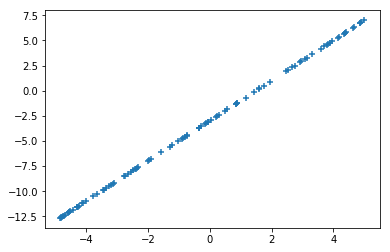

In [44]:
# matplotlibで散布図を表示する

plt.scatter(X, y, marker='+')
plt.show()

### scikit-learnで学習をさせます。
##### 〜　scikit-learnの使用法　〜

①　モデルを選択し、分類器のオブジェクトを生成する。

②　fit()に訓練データを与えて、分類器のパラメータを学習

~~~
fit([説明変数 X], [目的変数 Y])
~~~

③　predict()にテストデータを与えて予測

④　score()で分類器の性能を検証


今回は①と②をします。

In [45]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

scikit-learnは、①も②も基本的に１行で書くことができます。

これで本当に学習できているのでしょうか？

このモデルが学習したのは、$y=ax+b$の$a$と$b$の部分です。
データ自体は、$y=2x-3$に当てはまるように作成したので、$a=2, b=-3$であれば学習成功となります。

さっそく、学習結果をみていきましょう。

In [46]:
# 係数aは、model.coef_、切片bはmodel.intercept_を参照します。
print('a : ' + str(linear_model.coef_))
print('b : ' + str(linear_model.intercept_))

a : [[ 2.]]
b : [-3.]


以上より、きちんと学習できていることが分かりました。

しかし、実際にはこんなに綺麗なデータはありません。実世界のデータには、もっとバラつきがあります。

ですから、先ほどのデータに少しバラつきを加えて、再度学習させてみましょう。

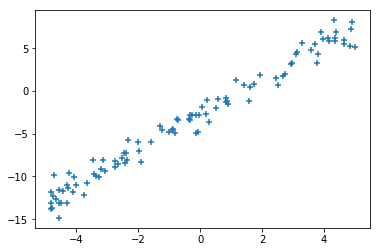

In [47]:
# バラつきを加える
y += np.random.randn(100, 1)

# matplotlibで散布図を表示する
plt.scatter(X, y, marker='+')
plt.show()

In [48]:
# バラつきを含んだデータを学習させる
linear_model_2 = LinearRegression()
linear_model_2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
# 係数aは、model.coef_、切片bはmodel.intercept_を参照します。
print('a : ' + str(linear_model_2.coef_))
print('b : ' + str(linear_model_2.intercept_))

a : [[ 2.04729176]]
b : [-2.79834301]


バラつきを含ませる前は、それぞれ2と-3だったので、ほぼ近似しています。

よってきちんと学習できていることが確認できました。


学習した直線をグラフで表示させてみましょう。

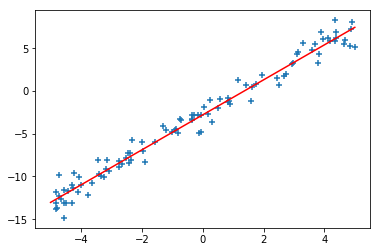

In [50]:
# グラフ表示
plt.scatter(X, y, marker='+')
x = np.linspace(-5, 5, 100)
plt.plot(x, linear_model_2.predict(x.reshape(100,1)), color='r')
plt.show()

### 単回帰のパラメータをどのように学習しているのか？
これまでは、scikit-learnを使って単回帰を実装し、きちんと学習できていることが分かりました。

しかし、これらのアルゴリズムはパラメータ（今回では、aとb）をどのように学習しているかは学んでいませんでした。

これからは、回帰を実現する上で欠かせない __「最小二乗法」__ というアイデアについて勉強していきます。

#### 最小二乗法とは？
最小二乗法とは、 __誤差の二乗の和を最小にすることで、最も確からしい関係式を求める方法__ です。

ここでは、最小二乗法によって回帰直線（$y=ax+b$）を求める場合を例にとって、最小二乗法の説明をしていきます。

下図の各プロットの目的変数（Y座標）を$y_{(i)}$、説明変数（X座標）を$x_{(i)}$、回帰直線を$y=f(x)$で表すとします。

![](https://s3.amazonaws.com/ai-standard/pic2-2.png)

直感的に回帰直線を引こうとすると、プロットとモデルの差が最小になるように線を引くことが求められます。

式にすると、$y_{(i)}-f(x_{(i)})$の総和が最小になる線です。

しかし、よく見てみるとプロットとモデルの差はプラスとマイナスの値のどちらも取り得ることが分かります。

このときに考えられる方法は２つあります。
- それぞれ絶対値を求め、その和をとる
- それぞれ二乗して、すべてプラスの値にする

絶対値が含まれている式は扱いが大変になるので、後者の二乗をする方法をとります。

すなわち、$(y_{(i)}-f(x_{(i)}))^2$の総和が最小になる関数が、回帰直線になります。

以上が、最小二乗法の概要です。

今回は、一次関数を参考に最小二乗法を勉強しましたが、変数が複数になっても同様に使用できるアルゴリズムになっています。
ですから、回帰問題を解く一般的な手法であるという認識を持っておくと良いでしょう。

#### プロットとモデルの差が最小になる値をもとめるには...？
機械学習アルゴリズムを構成する主要素の一つに、学習過程で最適化される「目的関数」を定義することがある。
多くの場合、この目的関数は最小化したいコスト関数である。

今回の場合は、
$$J(w)=\sum_{i}(y_{(i)}-f(x_{(i)}))^2 $$
となります。

しかし、後々の計算上の工夫のために、上記に$\frac{1}{2}$をした値を使います。

$$J(w)=\frac{1}{2} \sum_{i}(y_{(i)}-f(x_{(i)}))^2 $$


このコスト関数の特徴は、凸関数であることだ。

このため __勾配降下法__ を用いて、コスト関数を最小化する重みを見つけ出すことができる。

勾配降下法の原理は、コストが局所的または大局的最小値に達するまで、下図のように坂を下るというものだ。

![](https://s3.amazonaws.com/ai-standard/pic2-3.png)

##### 〜　アルゴリズム　〜
$初期値＝ｗ$、$ｋ＝０$、$w^*=arg~minJ(w)$
1. $w^{(k)}$が$w^{(*)}$に十分近いなら終了
2. $\nabla J(w^{(k)})$を計算
3. $w^{(k+1)} = w^{(k)} - \alpha^{(k)} \nabla J(w^{(k)})$    ※$\alpha$は学習率（進む幅）
4. $k = k+1$ として１へ。